In [4]:
import pandas as pd 
import numpy as np

In [5]:
df = pd.read_csv('HeartDisease.csv')

In [6]:
## Missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

np.int64(1)

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [55]:
## Data preprocessing ( Identify categorical values and numerical values)
cat_val = ['cp','fbs','restecg','exang','slope','ca','thal']
num_val= ['age','trestbps','chol','thalach','oldpeak']

In [30]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [182]:
df.shape

(302, 23)

In [ ]:
##Encoding categorical dtata( Get dummies variables for all categorical data)

In [46]:
cat_val

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [51]:
df = pd.get_dummies(df,columns=cat_val,dtype= 'int',drop_first=True)

In [52]:
df

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,0.2,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,1,110,264,132,1.2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,141,3.4,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,115,1.2,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [54]:
## Feature SCaling(Values are not in the same scaling),(We put numerical values in one stard scale)
from sklearn.preprocessing import StandardScaler

In [57]:
st= StandardScaler()
df[num_val] = st.fit_transform(df[num_val])

In [58]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [59]:
##independent an ddependent variable
X = df.drop(columns='target')
Y = df['target']

In [ ]:
### Split data into training and testing 

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [65]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((241, 22), (61, 22), (241,), (61,))

In [66]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression

In [67]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [68]:
y_pred=log.predict(X_test)

In [71]:
## Check the accuracy of the model
from sklearn.metrics import accuracy_score

In [114]:
##accuracy of the model
a = accuracy_score(Y_test,y_pred)

In [115]:
a

0.9016393442622951

In [77]:
## SVC model
from sklearn import svm

In [78]:
svm = svm.SVC()

In [79]:
svm.fit(X_train,Y_train)

SVC()

In [80]:
y_pred2 = svm.predict(X_test)

In [116]:
# accuracy of the model
b=accuracy_score(Y_test,y_pred2)

In [117]:
b

0.8688524590163934

In [83]:
##KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier

In [84]:
kn =KNeighborsClassifier()

In [85]:
kn.fit(X_train,Y_train)

KNeighborsClassifier()

In [87]:
y_pred3 = kn.predict(X_test)

In [118]:
# accuracy of the model
c=accuracy_score(Y_test,y_pred3)

In [119]:
c

0.8688524590163934

In [ ]:
## Non linear ML Algorithms
## For non linear algorithms we dont need to perfom Encoding and Feature Scaling 
# We can use our original data

In [183]:
data= pd.read_csv('HeartDisease.csv')

In [184]:
data.shape

(303, 14)

In [185]:
## Remove duplicates
data = data.drop_duplicates()

In [186]:
data.shape

(302, 14)

In [188]:
##independent an ddependent variable
X1 = data.drop(columns='target')
Y1 = data['target']

In [189]:
#split data into training and testing
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1, test_size=0.2, random_state=42)

In [190]:
#Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [191]:
dt =DecisionTreeClassifier()
dt.fit(X1_train,Y1_train)

DecisionTreeClassifier()

In [192]:
y_pred4 = dt.predict(X1_test)

In [193]:
# accuracy of the model
d = accuracy_score(Y1_test,y_pred4)

In [194]:
d

0.7868852459016393

In [195]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [196]:
rf = RandomForestClassifier()
rf.fit(X1_train,Y1_train)

RandomForestClassifier()

In [197]:
y_pred5 = dt.predict(X1_test)

In [198]:
# accuracy of the model
e =accuracy_score(Y1_test,y_pred5)

In [199]:
e

0.7868852459016393

In [200]:
## Gradient Boosting  Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [201]:
gbc = GradientBoostingClassifier()
gbc.fit(X1_train,Y_train)

GradientBoostingClassifier()

In [202]:
y_pred6 = dt.predict(X1_test)

In [203]:
# accuracy of the model
f=accuracy_score(Y1_test,y_pred6)

In [204]:
f

0.7868852459016393

In [206]:
data1 = pd.DataFrame({'Models': ['LR', 'SVM','KNN','DT','RF','GB'],'ACC': [ a,b,c,d,e,f]})

In [207]:
data1

,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.786885
4,RF,0.786885
5,GB,0.786885


In [208]:
import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: xlabel='Models'>

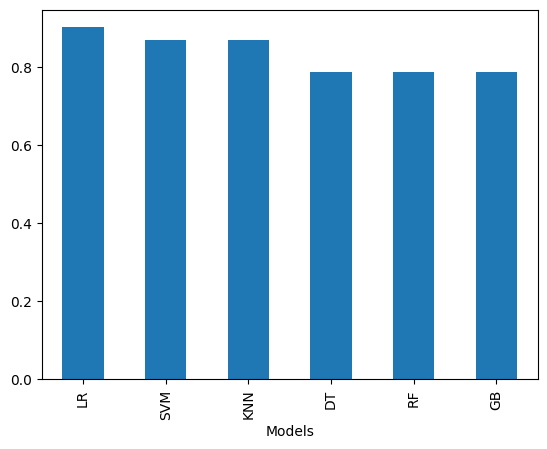

In [209]:
data1.plot(kind='bar', x='Models', y='ACC', legend=False)

In [ ]:
## The best Model is LR

In [ ]:
###Train our Model on the whole dataset

In [172]:
from sklearn.linear_model import LogisticRegression

In [210]:
log = LogisticRegression()
log.fit(X1,Y1)

C:\Users\LETSOELASELLO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [211]:
##pediction on the new data 
new_data = pd.DataFrame({'age': 54,
                         'sex':1,
                         'cp':0,
                         'trestbps':125,
                         'chol':212,
                         'fbs': 0,
                         'restecg':1,
                         'thalach': 168,
                         'exang':0,
                         'oldpeak': 1.0,
                         'slope':2,
                         'ca':2,
                         'thal':3},index=[0])
                

In [212]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,54,1,0,125,212,0,1,168,0,1.0,2,2,3


In [216]:
p = log.predict(new_data)

In [217]:
if p[0] ==0:
    print("No Disease")
else:
    print("Disease")
    

No Disease


In [218]:
##Save model Using Joblib
import joblib

In [219]:
joblib.dump(log,'model_joblib_heart')

['model_joblib_heart']

In [220]:
## If we want to use Our Model Again
model = joblib.load('model_joblib_heart')

In [221]:
model.predict(new_data)

array([0])